# Predicción y análisis

Haremos una predicción de la variable `Mas_1_Coche` en un nuevo set de datos empleando un modelo ya entrenado de XGBoost. Posteriormente, analizaremos los resultados obtenidos para crear un plan de negocio viable.

El primer paso es importar las librerías necesarias.

In [191]:
# Cargamos las librerías necesarias.
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Ahora cargamos nuestros datos.

In [192]:
# Cargamos nuestros datos.
X = pd.read_csv('../data/car_data_input_clean.csv', sep=',')

# Mostramos la forma y los primeros registros de nuestro DataFrame.
print(X.shape)
X.head()

(23230, 21)


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente
0,0,0,0,1,1,0,0,1,1,4,...,0,0,2,0,2,1,3,0,2,0
1,0,0,0,1,1,0,0,0,1,47,...,0,0,2,1,3,0,0,0,2,2
2,0,0,0,1,1,3,0,1,1,30,...,0,0,1,0,3,0,0,0,4,0
3,0,0,0,1,1,2,0,0,2,41,...,0,1,0,0,3,0,2,0,3,0
4,0,0,0,1,1,2,0,0,1,4,...,0,0,1,1,1,0,2,2,2,2


Cargamos el modelo con el que haremos la predicción y la variable `mapping` que contiene las equivalencias a las variables categóricas que modificamos a numéricas en la limpieza de datos.

In [193]:
# Importamos el modelo XGBoost y la variable de mapeo.

# Cargar el modelo.
modelo = joblib.load('../modelos/modelo_XGB.pkl')

# Cargar la variable.
with open('mappings.pkl', 'rb') as archivo:
    mappings = pickle.load(archivo)

#### Predicción

Una vez cargados todos los datos necesarios, comenzamos con la predicción. Estandarizamos las columnas.

In [194]:
# Creamos un objeto StandardScaler.
scaler = StandardScaler()

# Obtenemos las columnas del DataFrame.
cols = X.columns

# Ajustamos y escalamos las columnas del DataFrame.
X[cols] = scaler.fit_transform(X[cols])

Hacemos predicciones y obtenemos probabilidades usando nuestro modelo de XGBoost.

In [195]:
# Hacer predicciones en el conjunto de prueba.
predictions = modelo.predict(X)

# También puedes obtener las probabilidades de las clases.
probabilities = modelo.predict_proba(X)

Agregamos estos resultados al DataFrame. De esta manera, podremos ver qué perfiles de clientes podrían comprar más de un coche según nuestra predicción.

In [196]:
# Agregar las predicciones y probabilidades al DataFrame.
X['Mas_1_Coche'] = predictions
X['Probabilidad_0'] = probabilities[:, 0]
X['Probabilidad_1'] = probabilities[:, 1]

# Mostrar el DataFrame con las predicciones y probabilidades.
X.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,-0.914090,-0.530788,0.646277,-0.120750,-1.413129,...,-0.896734,-0.208340,1.290906,0.783958,-1.038295,-0.598089,-1.317786,0,0.913393,0.086607
1,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,-0.914090,-0.530788,-1.547325,-0.120750,1.394650,...,1.115158,0.777551,-0.774650,-1.371316,-1.038295,-0.598089,0.738171,0,0.965275,0.034725
2,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,1.534139,-0.530788,0.646277,-0.120750,0.284598,...,-0.896734,0.777551,-0.774650,-1.371316,-1.038295,0.198289,-1.317786,0,0.981233,0.018767
3,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,0.718063,-0.530788,-1.547325,3.438933,1.002867,...,-0.896734,0.777551,-0.774650,0.065533,-1.038295,-0.199900,-1.317786,1,0.274681,0.725319
4,-1.167679,-1.159343,-1.154266,-0.64262,0.307434,0.718063,-0.530788,-1.547325,-0.120750,-1.413129,...,1.115158,-1.194232,-0.774650,0.065533,0.509768,-0.598089,0.738171,0,0.890533,0.109467


Deshacemos la estandarización de datos que hicimos antes de meterlos en nuestro modelo.

In [197]:
# Deshacer el escalado.
X_original = X.copy()  # Copiar el DataFrame original.
X_original[cols] = scaler.inverse_transform(X[cols])  # Deshacer el escalado.

# Mostrar el DataFrame tras deshacer el escalado.
X_original.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,0.0,4.440892e-16,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,...,0.0,2.0,1.0,3.0,0.0,2.0,0.0,0,0.913393,0.086607
1,0.0,4.440892e-16,0.0,1.0,1.0,0.0,0.0,0.0,1.0,47.0,...,1.0,3.0,0.0,0.0,0.0,2.0,2.0,0,0.965275,0.034725
2,0.0,4.440892e-16,0.0,1.0,1.0,3.0,0.0,1.0,1.0,30.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0,0.981233,0.018767
3,0.0,4.440892e-16,0.0,1.0,1.0,2.0,0.0,0.0,2.0,41.0,...,0.0,3.0,0.0,2.0,0.0,3.0,0.0,1,0.274681,0.725319
4,0.0,4.440892e-16,0.0,1.0,1.0,2.0,0.0,0.0,1.0,4.0,...,1.0,1.0,0.0,2.0,2.0,2.0,2.0,0,0.890533,0.109467


Redondeamos a valores enteros.

In [198]:
X_original[cols] = X_original[cols].round().astype(int)

# Mostrar el DataFrame tras redondear las columnas.
X_original.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,0,0,0,1,1,0,0,1,1,4,...,0,2,1,3,0,2,0,0,0.913393,0.086607
1,0,0,0,1,1,0,0,0,1,47,...,1,3,0,0,0,2,2,0,0.965275,0.034725
2,0,0,0,1,1,3,0,1,1,30,...,0,3,0,0,0,4,0,0,0.981233,0.018767
3,0,0,0,1,1,2,0,0,2,41,...,0,3,0,2,0,3,0,1,0.274681,0.725319
4,0,0,0,1,1,2,0,0,1,4,...,1,1,0,2,2,2,2,0,0.890533,0.109467


#### Análisis

Hacemos un mapa de calor para ver qué variables están correlacionadas con nuestra predicción `Mas_1_Coche`.

In [199]:
# Función para crear una matriz de correlación y su mapa de calor.

def mapa_correlacion(data):
    # Calcular la matriz de correlación.
    correlation_matrix = data.corr()

    # Configurar el tamaño de la figura.
    plt.figure(figsize=(15, 10))
    sns.set(style='white')

    # Crear la máscara para el triángulo superior.
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Crear un mapa de colores divergente
    cmap = sns.diverging_palette(0, 10, as_cmap=True)

    # Crear el mapa de calor con los valores de correlación anotados.
    sns.heatmap(correlation_matrix, 
                mask=mask,        # Aplicar la máscara.
                cmap=cmap,        # Mapa de colores.
                annot=True,       # Mostrar los números.
                fmt=".2f",        # Formato a dos decimales.
                vmin=-1, vmax=1,  # Limitar los valores entre -1 y 1.
                center=0,         # Centrar en 0.
                square=True,      # Hacer que los cuadros sean cuadrados.
                linewidths=0.5,   # Ancho de las líneas entre celdas.
                cbar_kws={"shrink": 0.5})  # Tamaño de la barra de color.

    # Mostrar el gráfico.
    plt.show()

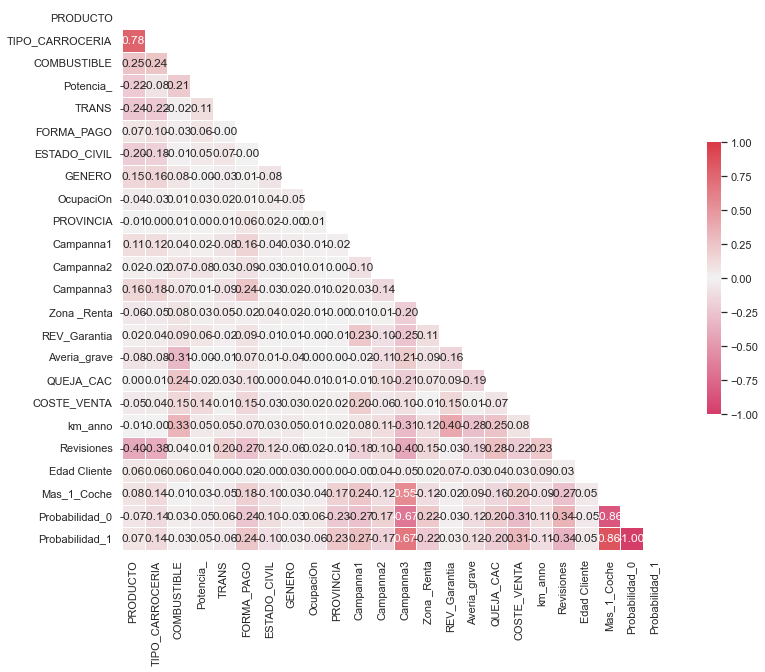

In [200]:
mapa_correlacion(X_original)

Podemos observar en la fila `Mas_1_Coche` que hay algo de correlación con las variables `FORMA_PAGO`, `Revisiones` y `Coste_Venta`. También vemos relación con las campañas, así que en este análisis nos dedicaremos a analizar estas columnas. Además, para realizar un perfil del cliente, nos parece interesente observar las variables `TIPO_CARROCERIA`, `COMBUSTIBLE`, `GENERO`y `ESTADO_CIVIL`. Obviamente, las columnas `Probabilidad_0` y `Probabilidad_1` están directamente correlacionadas con `Mas_1_Coche` ya que derivan directamente de esta variable predicha, por lo que no las analizaremos.

Para poder visualizar más comodamente los datos, aplicaremos el mapeo para tener nuestro DataFrame con variables categóricas.

In [201]:
# Invertir el diccionario de mapeo.
inverted_mappings = {col: {v: k for k, v in mapping.items()} for col, mapping in mappings.items()}

# Aplicar el mapeo invertido al DataFrame.
for column, mapping in inverted_mappings.items():
    X_original[column] = X_original[column].replace(mapping)

# Mostrar el DataFrame con las variables categóricas recuperadas.
X_original.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_Coche,Probabilidad_0,Probabilidad_1
0,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,NO DATA,Averia muy grave,SI,3k-5k,0-10k,2,18-40,0,0.913393,0.086607
1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,SI,No,NO,0-2k,0-10k,2,50-60,0,0.965275,0.034725
2,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,NO DATA,No,NO,0-2k,0-10k,4,18-40,0,0.981233,0.018767
3,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,NO DATA,No,NO,2k-3k,0-10k,3,18-40,1,0.274681,0.725319
4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Asturias,...,SI,Averia leve,NO,2k-3k,10k-20k,2,50-60,0,0.890533,0.109467


Ahora comenzamos con las visualizaciones de las columnas que comentamos anteriormente.

Aunque, primero, veamos la distribución de nuestras probabilidades.

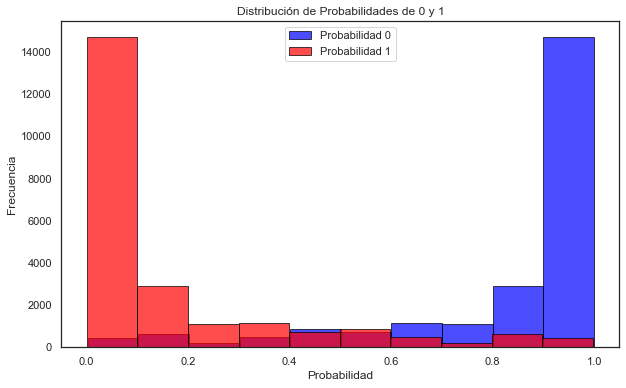

In [202]:
# Creación de gráfica de distribución de probabilidades
plt.figure(figsize=(10, 6))
plt.hist(X['Probabilidad_0'], bins=10, alpha=0.7, label='Probabilidad 0', color='blue', edgecolor='black')
plt.hist(X['Probabilidad_1'], bins=10, alpha=0.7, label='Probabilidad 1', color='red', edgecolor='black')

# Etiquetas y título
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades de 0 y 1')
plt.legend()

# Mostrar la gráfica
plt.show()


Veamos los perfiles de cada tipo de cliente. Para ello separamos en tres categorías: alta probabilidad, media y baja.

In [203]:
# Filtrar clientes.
clientes_alta_prob = X_original[X_original['Probabilidad_1'] > 0.6]
clientes_media_prob = X_original[(X_original['Probabilidad_1'] >= 0.4) & (X_original['Probabilidad_1'] <= 0.6)]
clientes_baja_prob = X_original[X_original['Probabilidad_1'] < 0.4]

Podemos empezar visualizando la distribución de estos clientes.

In [204]:
# Función para crear un pie chart.

def pie_chart(etiquetas, *args):
    # Asegurarse de que el número de etiquetas coincida con el número de variables
    if len(etiquetas) != len(args):
        raise ValueError("El número de etiquetas debe coincidir con el número de variables.")

    # Calcular la cantidad de clientes en cada categoría
    cantidades = [len(var) for var in args]

    # Crear el gráfico circular
    plt.figure(figsize=(6, 6))
    plt.pie(cantidades, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors[:len(cantidades)])
    plt.title('Distribución de clientes según categorías')
    plt.show()

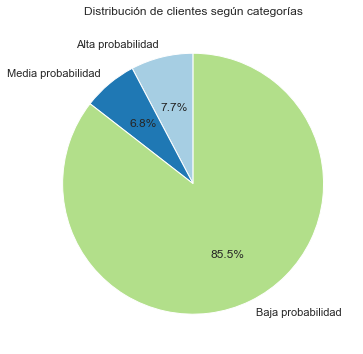

In [205]:
etiquetas = ['Alta probabilidad', 'Media probabilidad', 'Baja probabilidad']
pie_chart(etiquetas, clientes_alta_prob, clientes_media_prob, clientes_baja_prob)

Observamos que nuestro modelo predice que más del 80% de los clientes tienen baja probabilidad de comprar más de un coche. Aunque deberíamos lanzar souciones de negocio a aquellos clientes que tienen más probabilidad de comprar más de un coche, está claro que nos debemos centrar más en aquellos perfiles que apenas tienen probabilidad de comprar más de un coche, pues son un número significativo.

Generemos un perfil de cliente para visualizar más o menos qué características tienen cada perfil de cliente.

In [206]:
# Función que muestra el perfil de los clientes

def graficar_perfiles_clientes(df, prob):
    # Definir estilo de gráficos
    sns.set(style="whitegrid")

    # Crear figura y subplots (2x2)
    fig, axes = plt.subplots(3, 2, figsize=(14, 10))

    # 1. Distribución del tipo de carrocería
    sns.countplot(data=df, x='TIPO_CARROCERIA', palette='Blues_r', ax=axes[0, 0])
    axes[0, 0].set_title(f'Distribución de Tipo de Carrocería (Probabilidad {prob})')
    axes[0, 0].set_xlabel('Tipo de Carrocería')
    axes[0, 0].set_ylabel('Cantidad de Clientes')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # 2. Distribución del tipo de combustible
    sns.countplot(data=df, x='COMBUSTIBLE', palette='Greens_r', ax=axes[0, 1])
    axes[0, 1].set_title(f'Distribución de Combustible (Probabilidad {prob})')
    axes[0, 1].set_xlabel('Tipo de Combustible')
    axes[0, 1].set_ylabel('Cantidad de Clientes')

    # 3. Distribución de la forma de pago
    sns.countplot(data=df, x='FORMA_PAGO', palette='Oranges_r', ax=axes[1, 0])
    axes[1, 0].set_title(f'Distribución de la Forma de Pago (Probabilidad {prob})')
    axes[1, 0].set_xlabel('Forma de Pago')
    axes[1, 0].set_ylabel('Cantidad de Clientes')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. Distribución de género y estado civil
    sns.countplot(data=df, x='GENERO', hue='ESTADO_CIVIL', palette='Set2', ax=axes[1, 1])
    axes[1, 1].set_title(f'Distribución de Género y Estado Civil (Probabilidad {prob})')
    axes[1, 1].set_xlabel('Género')
    axes[1, 1].set_ylabel('Cantidad de Clientes')

    # 5. Distribución de las revisiones
    sns.countplot(data=df, x='Revisiones', palette='Purples_r', ax=axes[2, 0])
    axes[2, 0].set_title(f'Distribución de las Revisiones (Probabilidad {prob})')
    axes[2, 0].set_xlabel('Revisiones')
    axes[2, 0].set_ylabel('Cantidad de Clientes')

    # 6. Distribución de el Coste de la Venta
    sns.histplot(data=df, x='COSTE_VENTA', kde=True, color='salmon', ax=axes[2, 1])
    axes[2, 1].set_title(f'Distribución del Coste de la Venta (Probabilidad {prob})')
    axes[2, 1].set_xlabel('Coste de la Venta')
    axes[2, 1].set_ylabel('Cantidad de Clientes')

    # Ajustar diseño
    plt.tight_layout()

    # Mostrar gráficas
    plt.show()

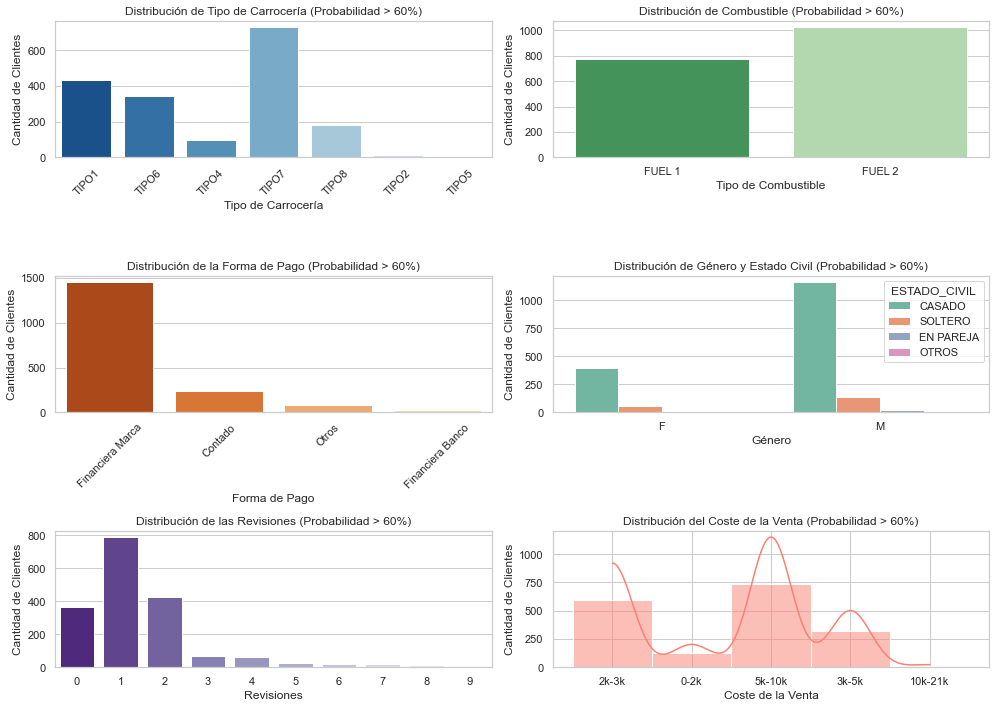

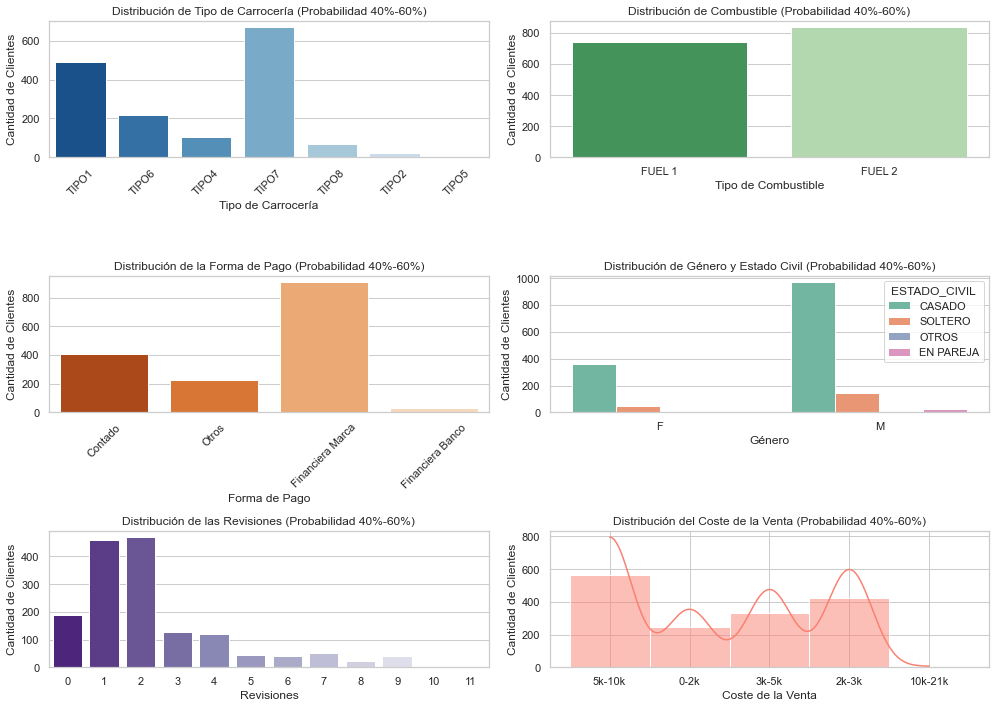

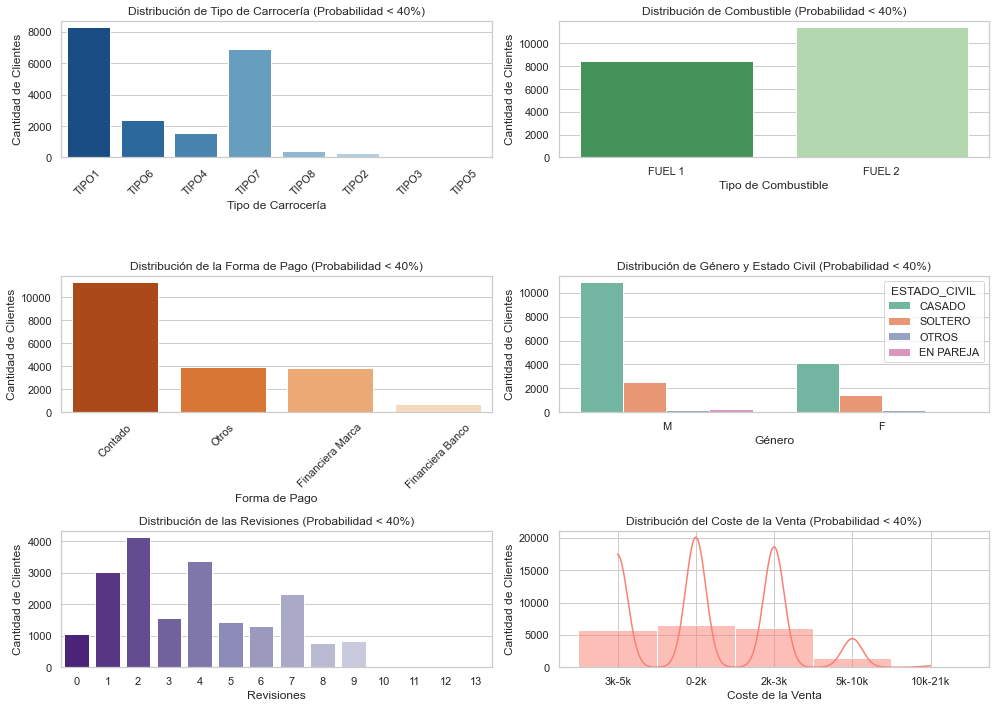

In [207]:
# Graficamos los perfiles de los clientes.
graficar_perfiles_clientes(clientes_alta_prob, '> 60%')
graficar_perfiles_clientes(clientes_media_prob, '40%-60%')
graficar_perfiles_clientes(clientes_baja_prob, '< 40%')

También queríamos ver qué distribución de clientes hay en las campañas. Es decir, qué tipo de clientes suelen decir que sí a las campañas que ofrecemos.

In [208]:
# Función para unificar las campañas donde SÍ se participa en una sola columna

def campanna(data):

    # Identificar todas las columnas que deseas mantener
    id_vars = data.columns.difference(['Campanna1', 'Campanna2', 'Campanna3']).tolist()
    
    # Usamos melt para transformar las columnas de campañas a un formato largo
    melted = data.melt(id_vars=id_vars,  # Mantén todas las demás columnas
                       var_name='Campannas', 
                       value_name='Participa')
        
    # Filtramos solo las filas donde 'Participa' es 'SI'
    return melted[melted['Participa'] == 'SI']

In [209]:
# Función que muestra la distribución de participación en campañas

def distribucion_campannas(df):

    fig, ax = plt.subplots(figsize=(10, 6))

    sns.countplot(data=df, x='Campannas', hue='Probabilidad', palette='Accent', ax=ax)

    ax.set_title('Distribución de Participación en Campañas por Nivel de Probabilidad')
    ax.set_xlabel('Campaña')
    ax.set_ylabel('Cantidad de Clientes')
    plt.legend(title='Nivel de Probabilidad')
    
    plt.show()

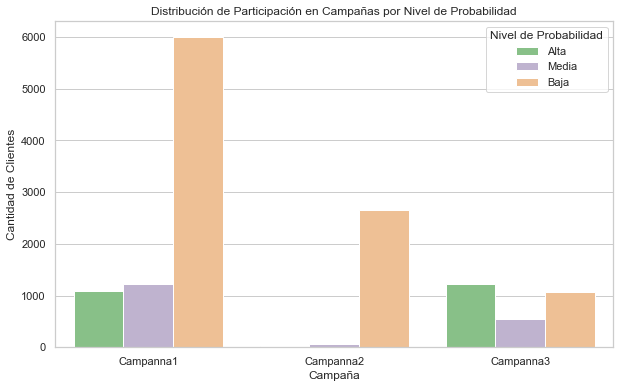

In [210]:
# Unificamos las campañas para cada categoría de cliente
alta_melt = campanna(clientes_alta_prob)
media_melt = campanna(clientes_media_prob)
baja_melt = campanna(clientes_baja_prob)

# Agregamos una columna temporal que solo usaremos en la gráfica para identificar el tipo de probabilidad
alta_melt['Probabilidad'] = 'Alta'
media_melt['Probabilidad'] = 'Media'
baja_melt['Probabilidad'] = 'Baja'

# Combinamos todos los DataFrames en uno solo para graficar
clientes_filtrados = pd.concat([alta_melt, media_melt, baja_melt])

# Mostramos la distribución de participación en campañas
distribucion_campannas(clientes_filtrados)

Vemos que generalmente aquellos que tienen menos probabilidad de comprar más de un coche se benefician de las campañas que se ofrecen, especialmente de la primera. Por lo tanto, si aún siendo beneficiarios de las campañas, no compran más de un coche, podemos deducir que estas campañas no se adecúan a sus necesidades.

Veamos cada perfil de cliente por cada campaña.

In [211]:
# Filtramos por campañas
campanna1 = clientes_filtrados[clientes_filtrados['Campannas'] == 'Campanna1']
campanna2 = clientes_filtrados[clientes_filtrados['Campannas'] == 'Campanna2']
campanna3 = clientes_filtrados[clientes_filtrados['Campannas'] == 'Campanna3']

Comenzamos con la primera campaña.

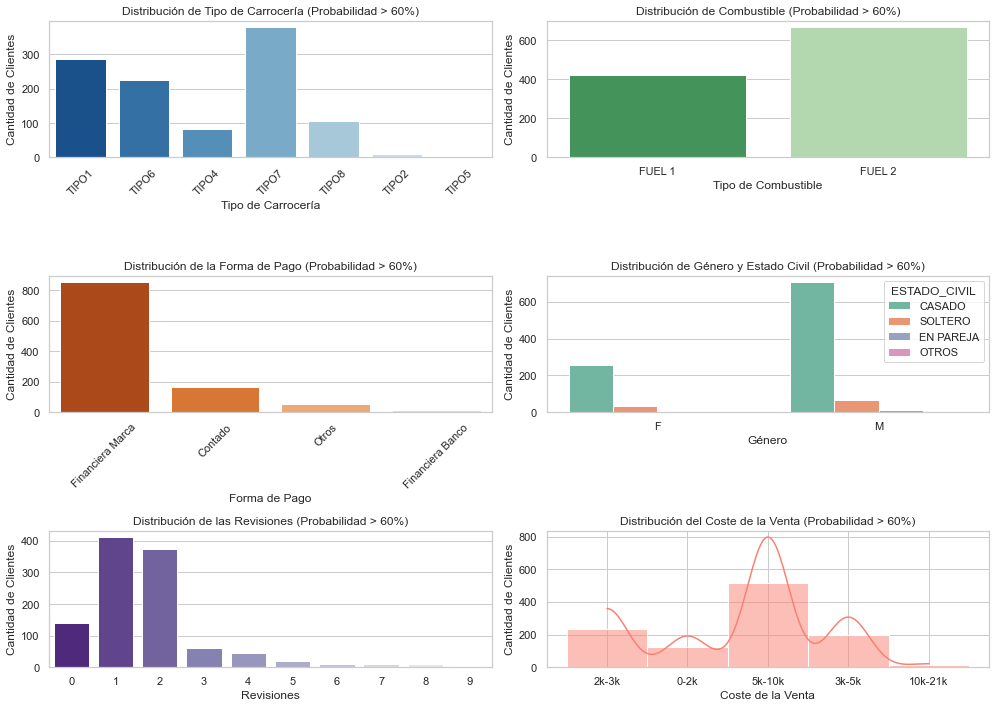

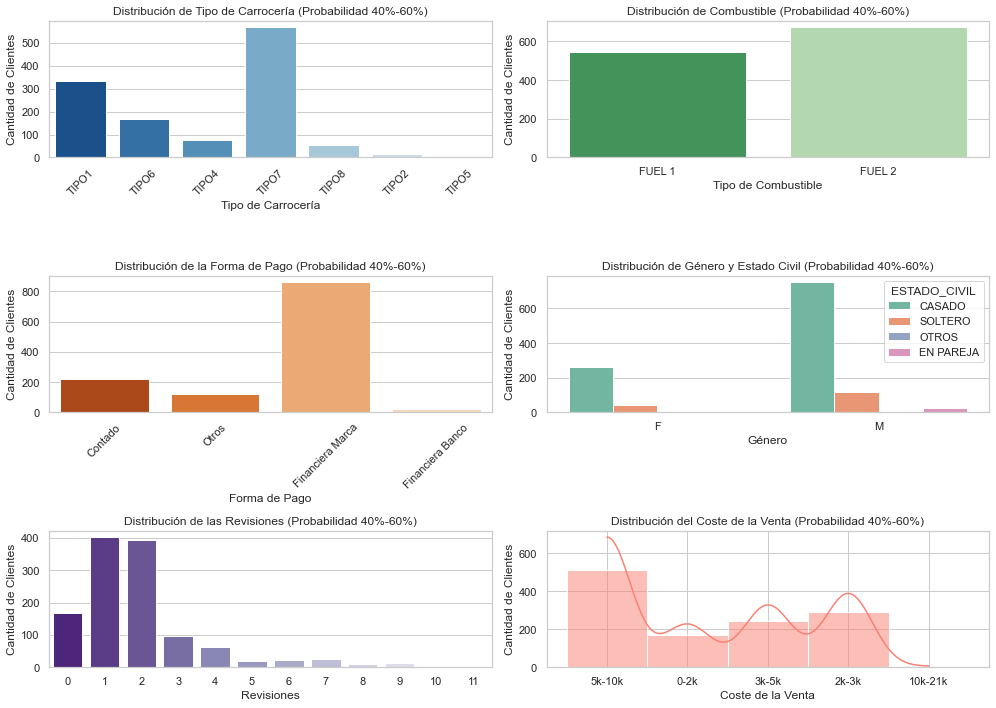

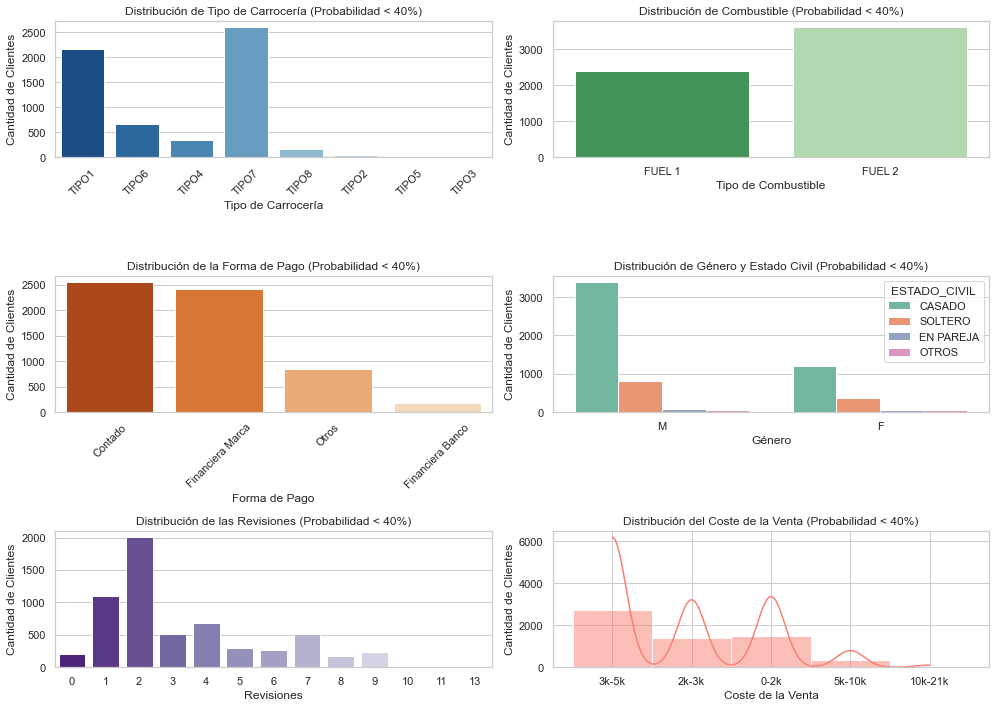

In [212]:
# Filtramos por probabilidad
alta_campanna1 = campanna1[campanna1['Probabilidad'] == 'Alta']
media_campanna1 = campanna1[campanna1['Probabilidad'] == 'Media']
baja_campanna1 = campanna1[campanna1['Probabilidad'] == 'Baja']

# Graficamos los perfiles de los clientes.
graficar_perfiles_clientes(alta_campanna1, '> 60%')
graficar_perfiles_clientes(media_campanna1, '40%-60%')
graficar_perfiles_clientes(baja_campanna1, '< 40%')

Ahora la segunda campaña.

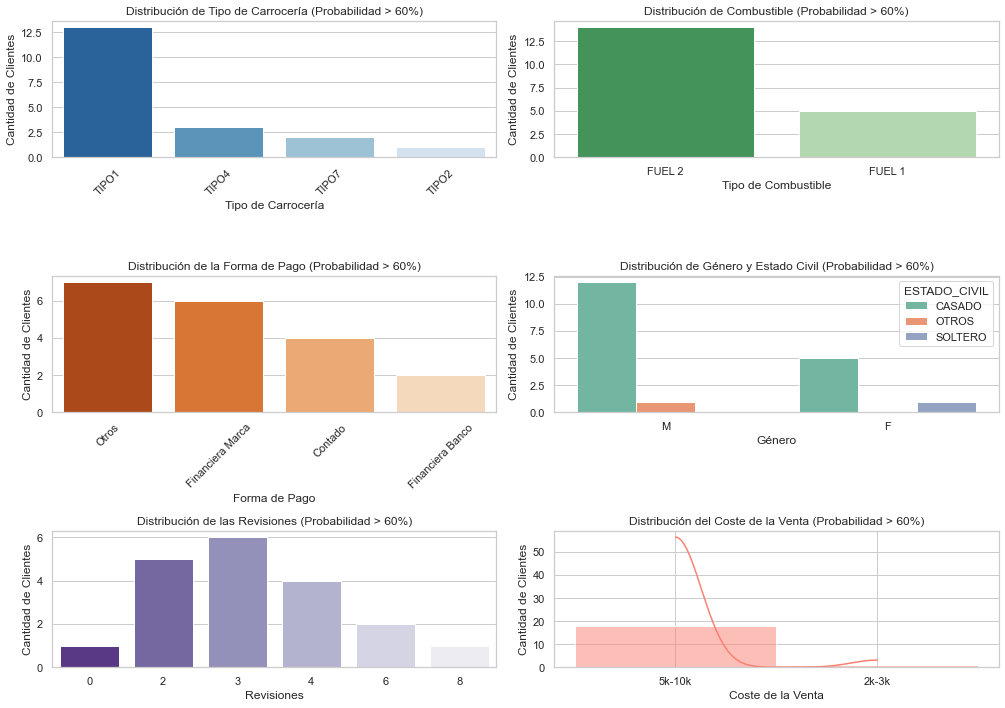

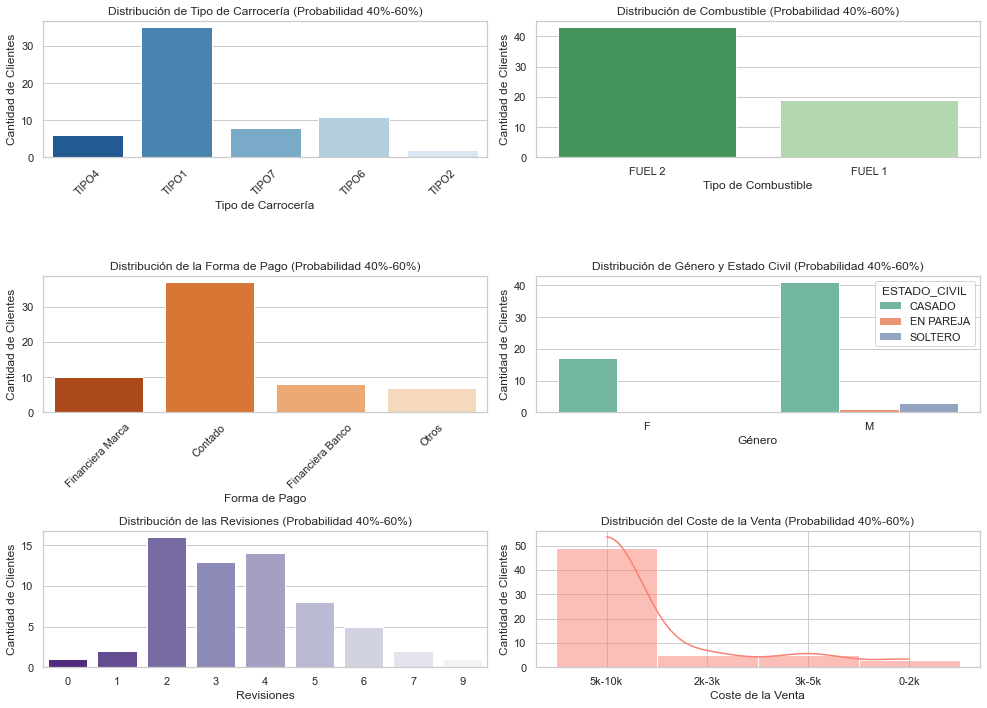

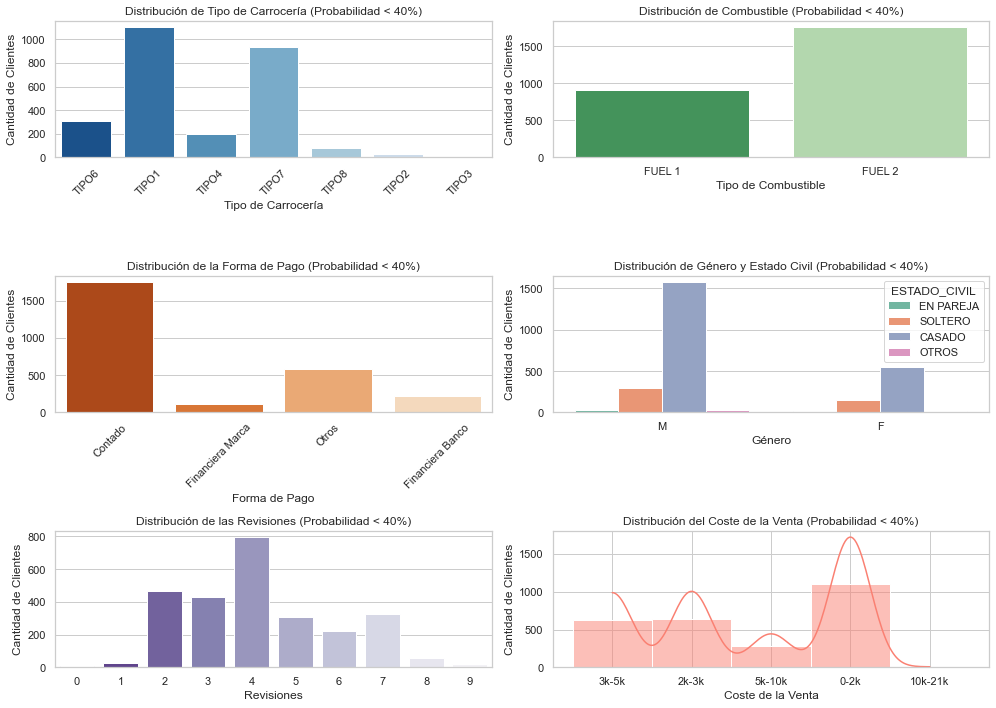

In [213]:
# Filtramos por probabilidad
alta_campanna2 = campanna2[campanna2['Probabilidad'] == 'Alta']
media_campanna2 = campanna2[campanna2['Probabilidad'] == 'Media']
baja_campanna2 = campanna2[campanna2['Probabilidad'] == 'Baja']

# Graficamos los perfiles de los clientes.
graficar_perfiles_clientes(alta_campanna2, '> 60%')
graficar_perfiles_clientes(media_campanna2, '40%-60%')
graficar_perfiles_clientes(baja_campanna2, '< 40%')

Por último, la tercera campaña.

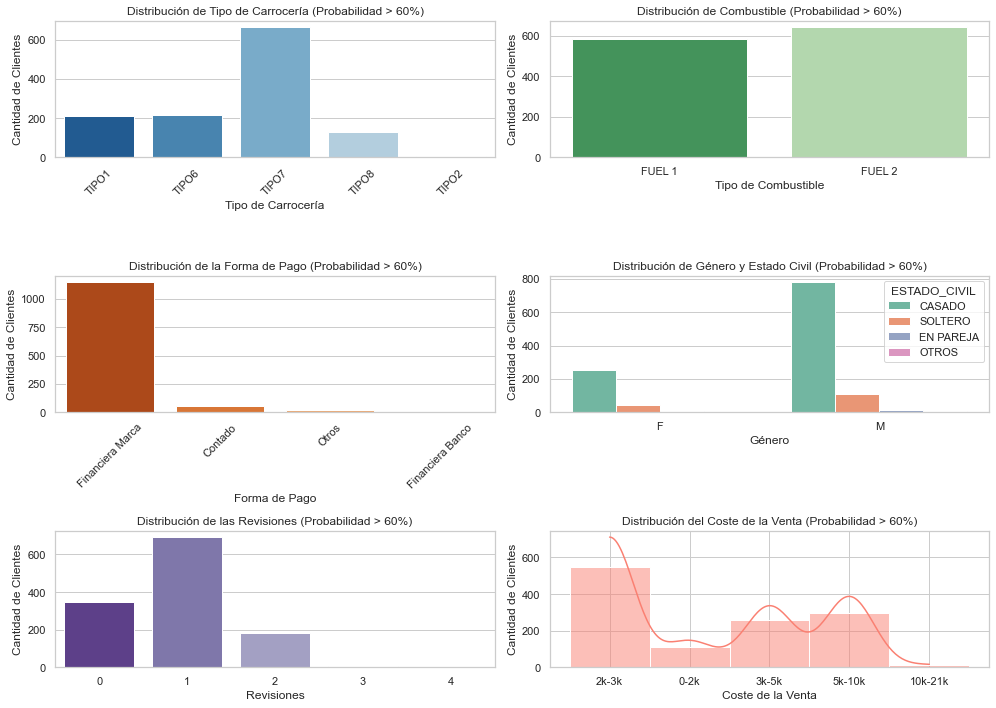

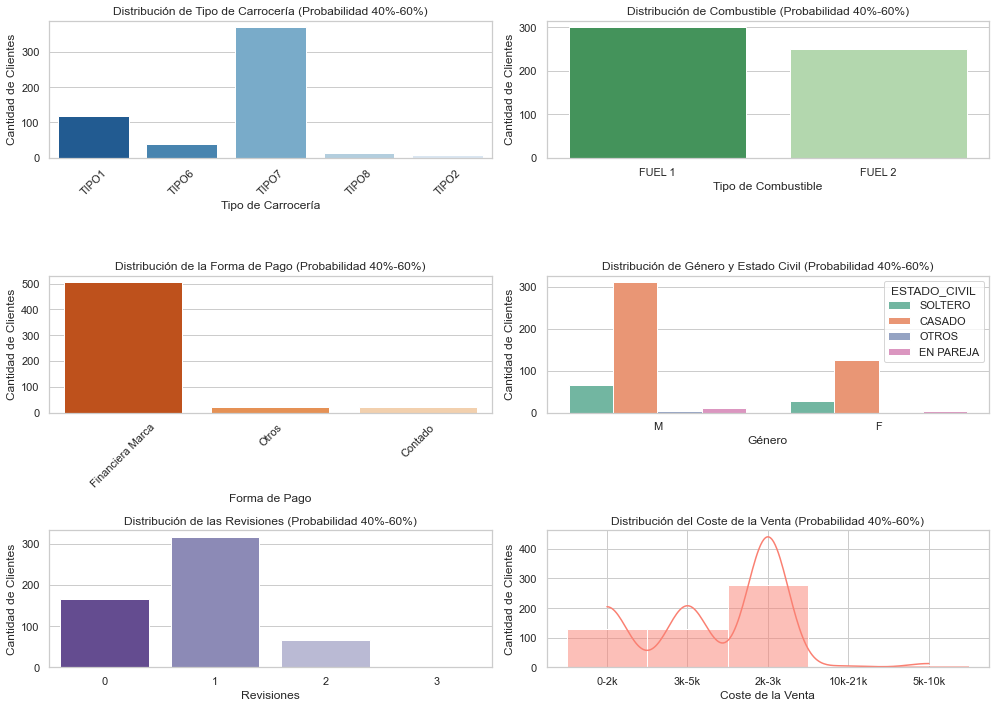

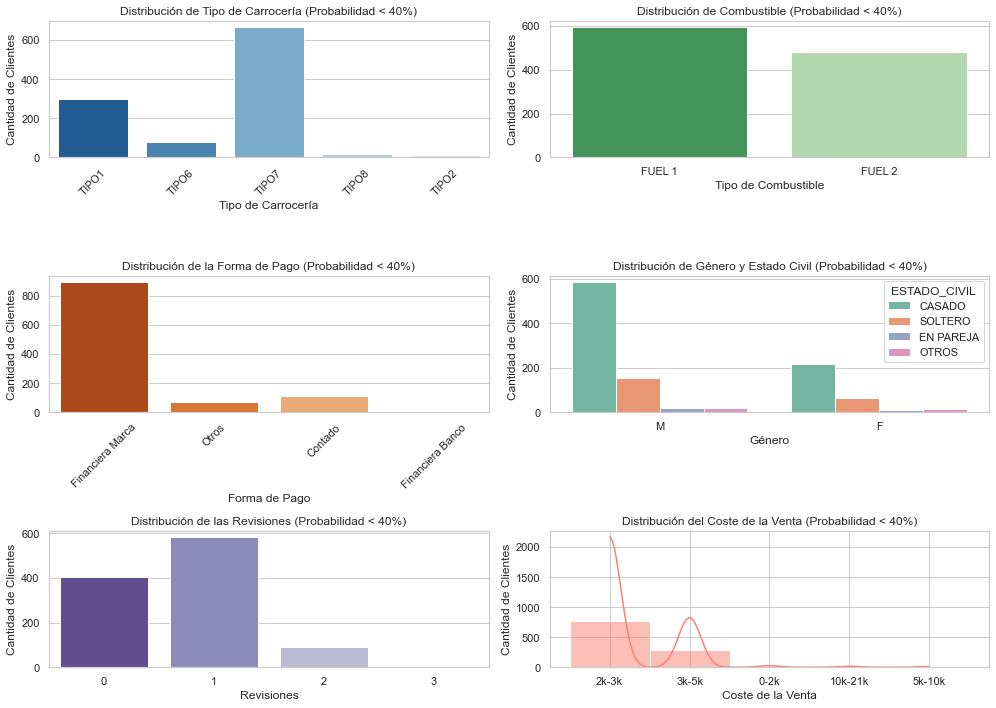

In [216]:
# Filtramos por probabilidad
alta_campanna3 = campanna3[campanna3['Probabilidad'] == 'Alta']
media_campanna3 = campanna3[campanna3['Probabilidad'] == 'Media']
baja_campanna3 = campanna3[campanna3['Probabilidad'] == 'Baja']

# Graficamos los perfiles de los clientes.
graficar_perfiles_clientes(alta_campanna3, '> 60%')
graficar_perfiles_clientes(media_campanna3, '40%-60%')
graficar_perfiles_clientes(baja_campanna3, '< 40%')

Por último, guardamos los nuevos datos que contienen la información predicha.

In [215]:
# Guardar los resultados.
X_original.to_csv('../data/predicciones.csv', index=False)